Réalisé par:


*  Karim Ellouze
*   Selma Guedidi
*  Ahmed Aziz Boussaid



# Algorithme
1.1.Quelle est sa complexité en temps ?

-> O(n * p * nbre d'iterations)

1.2. Quelle est sa complexité en espace ?

-> O(n*p)

# Exercice 1

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

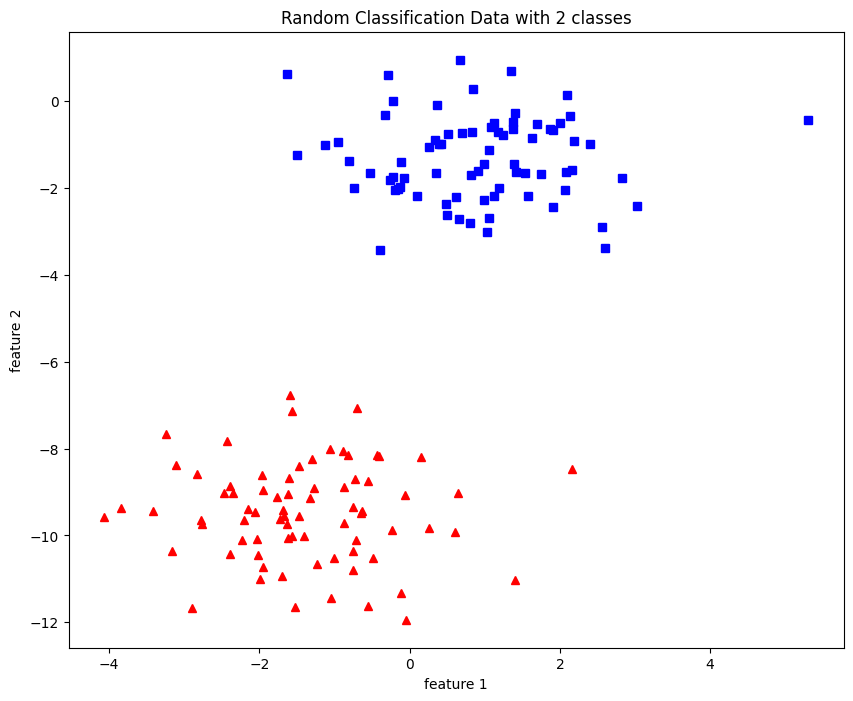

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_blobs (n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
def acti_func(z):
  if z>0:
    return 1
  else:
    return 0

In [ ]:
import numpy as np

def perceptron(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n+1,1))
    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0

        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = acti_func(np.dot(x_i.T, w))

            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr * (y[idx] - np.squeeze(y_hat)) * x_i
                n_miss += 1

        n_miss_list.append(n_miss)

    return w, n_miss_list

In [ ]:
perceptron(X,y,0.001,10)

(array([[0.01      ],
        [0.0014886 ],
        [0.00169384]]),
 [14, 0, 0, 0, 0, 0, 0, 0, 0, 0])

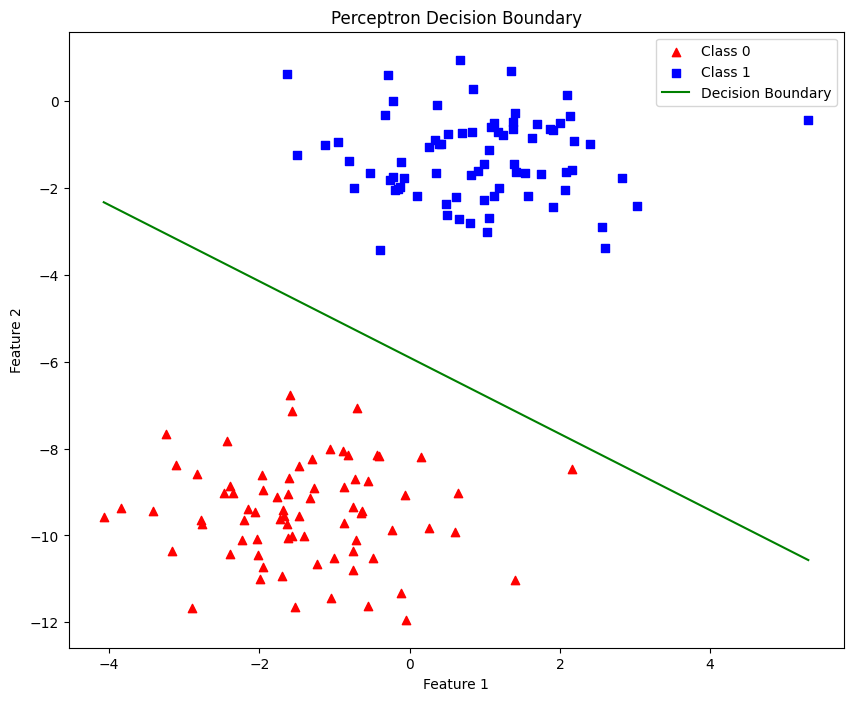

In [ ]:
def plot_decision_boundary(X,y, w):
    # Assuming X has shape (m, 2) for two-dimensional features
    plt.figure(figsize=(10, 8))

    # Scatter plot for class 0 (assuming binary classification)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='^', label='Class 0')

    # Scatter plot for class 1
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='s', label='Class 1')

    m = -w[1] / w[2]
    c = -w[0] / w[2]

    x1 = [min(X[:, 0]), max(X[:, 0])]
    x2 = m * x1 + c
    plt.plot(x1, x2, color='green' , label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

w, _ = perceptron(X, y, lr=0.001, epochs=10)
plot_decision_boundary(X,y, w)

# Exercice 2

In [ ]:
from sklearn.utils import shuffle
n_samples = 250

X1, y1 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=0.25, random_state=2, center_box=(1,0))
X2, y2 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=0.25, random_state=2,center_box=(-1,0))
y2 = np.full((n_samples,), 1)
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)
X, y = shuffle(X, y, random_state=42)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (250, 2)
y shape: (250,)


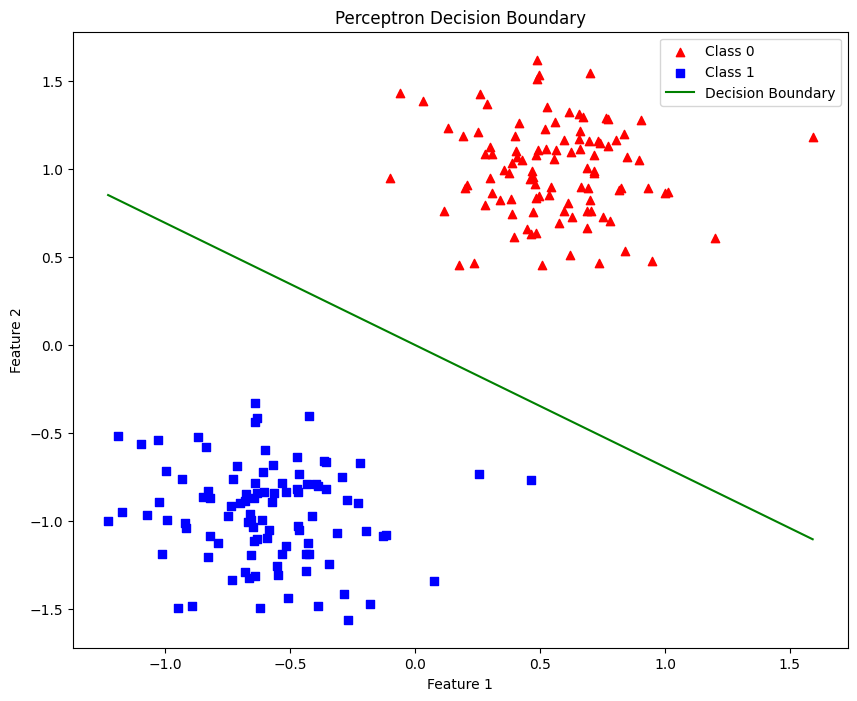

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
w_train,_ = perceptron(X_train,y_train,0.001,10)
plot_decision_boundary(X_train,y_train, w_train)

In [ ]:
def predict(weights, X_test):
    Z = np.squeeze(np.dot(X_test,weights[1:3])+weights[0])
    predictions = np.where(Z >= 0, 1, 0)
    return predictions

def accuracy(weights, X_test, y_test):
    y_pred = predict(weights, X_test)
    accuracy = np.mean(y_pred == y_test)
    missed_predictions = X_test[y_pred != y_test]
    return accuracy , 1-accuracy
print(accuracy(w_train,X_test,y_test))

(1.0, 0.0)


In [ ]:
from sklearn.utils import shuffle
n_samples = 250

X1, y1 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=0.75, random_state=2, center_box=(1,0))
X2, y2 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=0.75, random_state=2,center_box=(-1,0))
y2 = np.full((n_samples,), 1)
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)
X, y = shuffle(X, y, random_state=42)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (500, 2)
y shape: (500,)


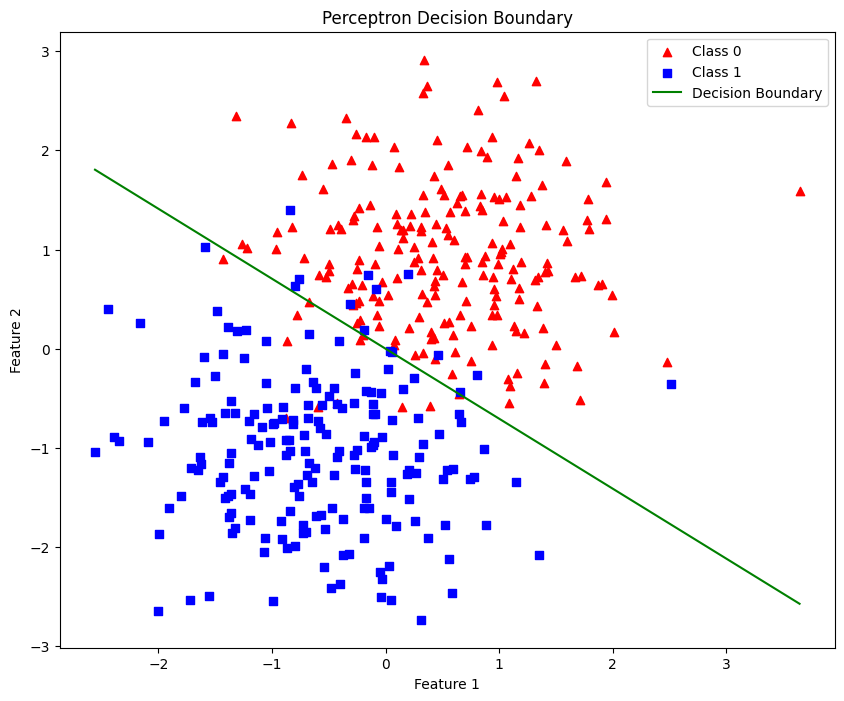

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
w_train,_ = perceptron(X_train,y_train,0.001,3)
plot_decision_boundary(X_train,y_train, w_train)

In [ ]:
print(accuracy(w_train,X_test,y_test))

(0.94, 0.06000000000000005)


In [ ]:
from sklearn import datasets

def experience(n_samples, sigma):
    X1, y1 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=sigma, random_state=2, center_box=(1,0))
    X2, y2 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=sigma, random_state=2,center_box=(-1,0))
    y2 = np.full((n_samples,), 1)
    X = np.concatenate((X1, X2), axis=0)
    y = np.concatenate((y1, y2), axis=0)
    X, y = shuffle(X, y, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    weights, _ = perceptron(X_train, y_train, 0.001, 30)
    exp_accuracy, exp_error = accuracy(weights, X_test, y_test)
    return exp_accuracy, exp_error


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigmas = [0.01, 0.1, 0.5, 0.7]

variances_error = []
means_error = []

for sigma in sigmas:
        print(f"*********for sigma = {sigma}********")
        errors=[]
        for i in range(30):
          print(f"experience {i+1} : ")
          exp_accuracy,exp_error=experience(125,sigma)
          print(f"accuracy : {exp_accuracy}**** error : {exp_error}")
          errors.append(exp_error)
        mean_error = np.mean(errors)
        variance_error = np.var(errors)
        means_error.append(mean_error)
        variances_error.append(variance_error)

plt.figure(figsize=(10, 6))

*********for sigma = 0.01********
experience 1 : 
accuracy : 1.0**** error : 0.0
experience 2 : 
accuracy : 1.0**** error : 0.0
experience 3 : 
accuracy : 1.0**** error : 0.0
experience 4 : 
accuracy : 1.0**** error : 0.0
experience 5 : 
accuracy : 1.0**** error : 0.0
experience 6 : 
accuracy : 1.0**** error : 0.0
experience 7 : 
accuracy : 1.0**** error : 0.0
experience 8 : 
accuracy : 1.0**** error : 0.0
experience 9 : 
accuracy : 1.0**** error : 0.0
experience 10 : 
accuracy : 1.0**** error : 0.0
experience 11 : 
accuracy : 1.0**** error : 0.0
experience 12 : 
accuracy : 1.0**** error : 0.0
experience 13 : 
accuracy : 1.0**** error : 0.0
experience 14 : 
accuracy : 1.0**** error : 0.0
experience 15 : 
accuracy : 1.0**** error : 0.0
experience 16 : 
accuracy : 1.0**** error : 0.0
experience 17 : 
accuracy : 1.0**** error : 0.0
experience 18 : 
accuracy : 1.0**** error : 0.0
experience 19 : 
accuracy : 1.0**** error : 0.0
experience 20 : 
accuracy : 1.0**** error : 0.0
experience 21 :

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
print(means_error)

[0.0, 0.0, 0.0, 0.040000000000000036]


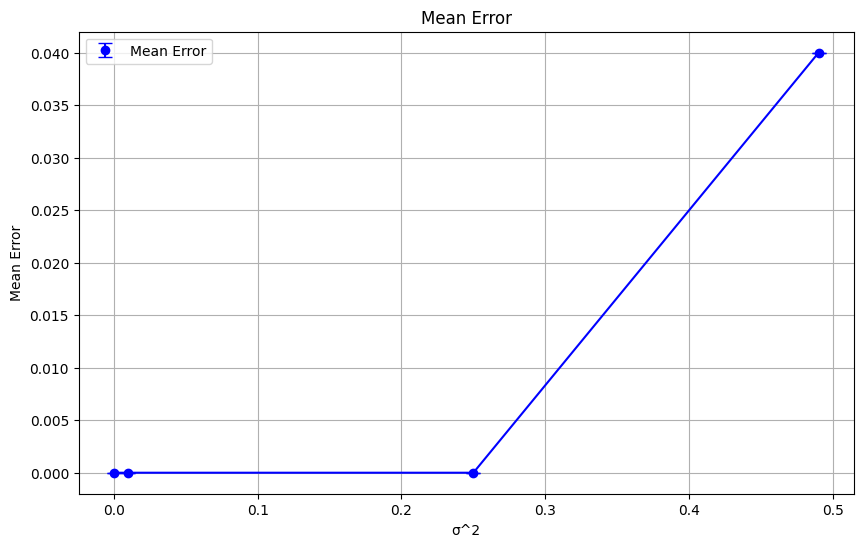

In [ ]:
plt.figure(figsize=(10, 6))
squared_sigmas = [sigma ** 2 for sigma in sigmas]

plt.errorbar(squared_sigmas, means_error, yerr=np.sqrt(variances_error), color='b', ecolor='blue', capsize=5,fmt='o', label='Mean Error')
plt.plot(squared_sigmas, means_error, linestyle='-', marker='', color='blue')

plt.xlabel('σ^2')
plt.ylabel('Mean Error')
plt.title('Mean Error')
plt.legend()
plt.grid(True)
plt.show()